<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-файлов" data-toc-modified-id="Загрузка-файлов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файлов</a></span></li><li><span><a href="#Получение-основной-информации-о-данных" data-toc-modified-id="Получение-основной-информации-о-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Получение основной информации о данных</a></span></li><li><span><a href="#Деление-данных-на-выборки" data-toc-modified-id="Деление-данных-на-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Деление данных на выборки</a></span></li><li><span><a href="#Обучение-и-валидация-линейной-регрессии-без-применения-алгоритма-&quot;шифрования&quot;-данных,-расчет-R2-метрики" data-toc-modified-id="Обучение-и-валидация-линейной-регрессии-без-применения-алгоритма-&quot;шифрования&quot;-данных,-расчет-R2-метрики-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обучение и валидация линейной регрессии без применения алгоритма "шифрования" данных, расчет R2 метрики</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Функция,-реализующая-алгоритм-&quot;шифрования&quot;-для-признаков-валидационной-и-обучающей-выборок" data-toc-modified-id="Функция,-реализующая-алгоритм-&quot;шифрования&quot;-для-признаков-валидационной-и-обучающей-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция, реализующая алгоритм "шифрования" для признаков валидационной и обучающей выборок</a></span></li><li><span><a href="#Обучение-и-валидация-линейной-регрессии-с-применением-алгоритма-&quot;шифрования&quot;-данных,-расчет-R2-метрики" data-toc-modified-id="Обучение-и-валидация-линейной-регрессии-с-применением-алгоритма-&quot;шифрования&quot;-данных,-расчет-R2-метрики-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение и валидация линейной регрессии с применением алгоритма "шифрования" данных, расчет R2 метрики</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Загрузка файлов

In [2]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/10. Линейная алгебра/Проект/insurance.csv'
path_2 = 'https://code.s3.yandex.net/datasets/insurance.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/insurance.csv'
path_4 = '/datasets/insurance.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    data = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    data = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    data = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')

### Получение основной информации о данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
display(data.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


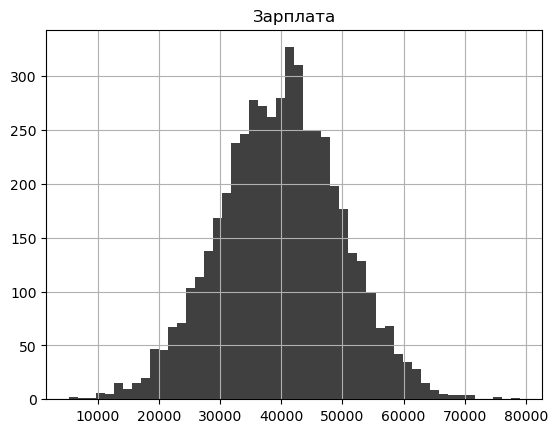

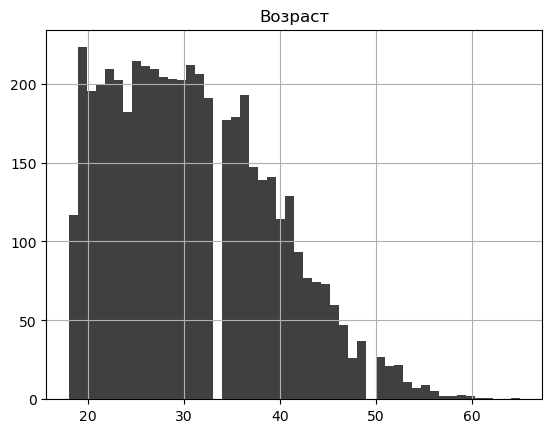

<BarContainer object of 6 artists>

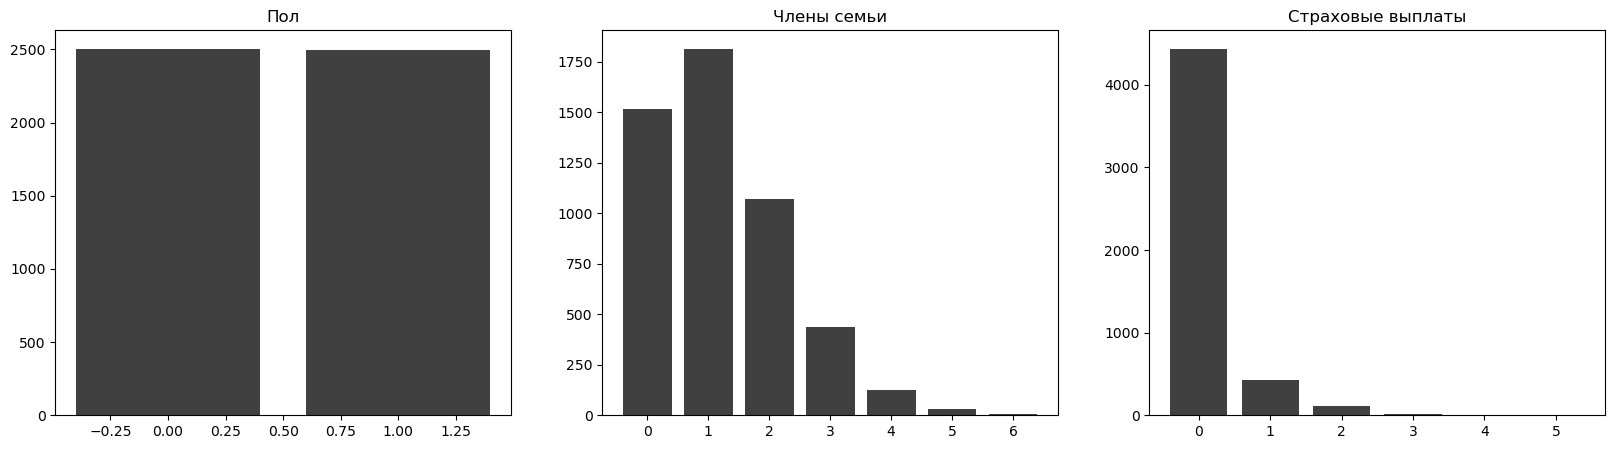

In [5]:
data['Зарплата'].hist(bins = 50, color = 'black', alpha = 0.75)
plt.title('Зарплата')
plt.show()
data['Возраст'].hist(bins = 50, color = 'black', alpha = 0.75)
plt.title('Возраст')
plt.show()


data_gender = data.pivot_table(index = 'Пол', values = 'Возраст', aggfunc = 'count')\
.reset_index().rename(columns = {'Возраст' : 'Количество'})

data_family = data.pivot_table(index = 'Члены семьи', values = 'Возраст', aggfunc = 'count')\
.reset_index().rename(columns = {'Возраст' : 'Количество'})

data_payments = data.pivot_table(index = 'Страховые выплаты', values = 'Возраст', aggfunc = 'count')\
.reset_index().rename(columns = {'Возраст' : 'Количество'})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set(title = 'Пол')
ax2.set(title = 'Члены семьи')
ax3.set(title = 'Страховые выплаты')

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.bar(data_gender['Пол'], 
         data_gender['Количество'], 
         color = 'black', 
         alpha = 0.75)

ax2.bar(data_family['Члены семьи'], 
         data_family['Количество'], 
         color = 'black', 
         alpha = 0.75)

ax3.bar(data_payments['Страховые выплаты'], 
         data_payments['Количество'], 
         color = 'black', 
         alpha = 0.75)


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


### Деление данных на выборки

In [7]:
data_features = data.drop('Страховые выплаты', axis = 1)
data_target = data['Страховые выплаты']

features_train, features_valid, target_train, target_valid = train_test_split(
    data_features, data_target, test_size = 0.25, random_state = 12345) 

print('Размер обучающей выборки признаков:', features_train.shape[0])
print('Размер обучающей выборки целевого признака:', target_train.shape[0])
print('Размер валидационной выборки признаков:', features_valid.shape[0])
print('Размер валидационной выборки целевого признака:', target_valid.shape[0])

Размер обучающей выборки признаков: 3750
Размер обучающей выборки целевого признака: 3750
Размер валидационной выборки признаков: 1250
Размер валидационной выборки целевого признака: 1250


### Обучение и валидация линейной регрессии без применения алгоритма "шифрования" данных, расчет R2 метрики

In [8]:
model_1 = LinearRegression()
model_1.fit(features_train, target_train)
predictions_valid = model_1.predict(features_valid)

print('R2 =', r2_score(target_valid, predictions_valid))

R2 = 0.43522757127025635


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** умножение матрицы признаков на обратимую матрицу не меняет качества линейной регрессии

**Обоснование:** 

Предсказания без умножения на обратимую матрицу:

$$
a_1 = Xw 
$$

Вектор весов без умножения на обратимую матрицу:

$$
w = (X^T X)^{-1} X^T y
$$

Предсказания с умножением на обратимую матрицу:

$$
a_2 = XPw_p
$$

Вектор весов с умножением на обратимую матрицу:

$$
w_p = [(XP)^T (XP)]^{-1} (XP)^T y
$$

Упрощение выражения для вектора весов с умножением на обратимую матрицу:

$$
w_p = [(XP)^T (XP)]^{-1} (XP)^T y = [P^T X^T X P]^{-1} P^T X^T y = (X P)^{-1} (P^T X^T)^{-1} P^T X^T y = P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Предсказания с умножением на обратимую матрицу выраженное иначе:

$$
a_2 = X P P^{-1} w = Xw = a_1
$$

Тождество:

$$
a_2 = a_1
$$

**Обоснование исправленное:**
$$
w_p = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} (XP)^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

$$
a = X P w_p = X P P^{-1} w = X E w = X w
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.....
$$

## Алгоритм преобразования

**Алгоритм**

Алгоритмом в данном случае является умножение матрицы признаков на любую обратимую матрицу. 

**Обоснование**

Обоснование алгоритма находится в п. 2 настоящей работы.

## Проверка алгоритма

### Функция, реализующая алгоритм "шифрования" для признаков валидационной и обучающей выборок

In [9]:
def generate_invertible_matrix(size):
    try:
        matrix = np.random.normal(size=(size, size))
        # проверим матрицу на обратимость, если нет, пробуем сгенерировать еще раз
        # таким образом гарантируем, что матрица стопроцентно будет обратимой
        np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        matrix = generate_invertible_matrix()
    
    return matrix

In [10]:
def features_transform(features_train, features_valid):
    size = features_train.shape[1]
    matrix = generate_invertible_matrix(size)
    
    features_train_alt = features_train.values @ matrix
    features_train_alt = pd.DataFrame(features_train_alt, columns = features_train.columns)
    
    features_valid_alt = features_valid.values @ matrix
    features_valid_alt = pd.DataFrame(features_valid_alt, columns = features_valid.columns)
    
    return features_train_alt, features_valid_alt

In [11]:
features_train_alt, features_valid_alt = features_transform(features_train, features_valid)

### Обучение и валидация линейной регрессии с применением алгоритма "шифрования" данных, расчет R2 метрики

In [12]:
model_2 = LinearRegression()
model_2.fit(features_train_alt, target_train)
predictions_valid = model_2.predict(features_valid_alt)

print('R2 =', r2_score(target_valid, predictions_valid))

R2 = 0.435227571270436


## Выводы

В данной работе данные пользователей были "зашифрованы" с помощью умножения матрицы признаков на обратимую матрицу. Данный метод не ухудшает качества линейной регрессии. Метрика R2 с и без умножения матрицы признаков на обратимую матрицу R2 = 0.435.